In [1]:
# -*- coding: utf-8 -*-
"""final cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1csqfNQ1OrJnix3DXxURsxKtNpzVvw57q
"""

# Importing the necessary libraries

import os
import cv2
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import keras
from keras.models import Sequential
from keras.callbacks import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline
# Loading images 
# Converting images to an size of (100,100)

def load_images(folder):
  train_data=[]
  for label in os.listdir(folder):
    print(label, " Started!")
    path=folder+'/'+label
    for img in os.listdir(path):
      img=cv2.imread(path+'/'+img,cv2.IMREAD_GRAYSCALE)
      new_img=cv2.resize(img,(100,100))
      if new_img is not None:
        train_data.append([new_img,label])
    # print(label, " ended!")
  return train_data

# Loading the train images and their corresponding labels

path='../data/Indian'
train_data=load_images(path)

# Loading the test images and their corresponding labels

path='../data/train.old'
# path='data/train.old'
test_data=load_images(path)

# Shuffling the data
random.shuffle(train_data)
random.shuffle(test_data)

# Seperating features and labels 
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

for feature, label in train_data:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in test_data:
  test_images.append(feature)
  test_labels.append(label)

#print(len(train_images))
#print(len(test_images))

# Converting images list to numpy array
train_images=np.array(train_images)
test_images=np.array(test_images)

train_images=train_images.reshape((-1,100,100,1))
test_images=test_images.reshape((-1,100,100,1))

train_images.shape
#test_images.shape

# Changing the datatype and Normalizing the data

train_images= train_images.astype('float32')
test_images = test_images.astype('float32')

train_images=train_images/255.0
test_images=test_images/255.0

# Encoding the label values

le=LabelEncoder()
le.fit(train_labels);
# le.fit_transform(train_labels)
# le.fit_transform(test_labels)
train_labels_label_encoded=le.transform(train_labels)
test_labels_label_encoded=le.transform(test_labels)

# test_labels_label_encoded


n_classes=35#24#36


# One hot encoding
train_labels_one_hot = to_categorical(train_labels_label_encoded,num_classes=n_classes)
test_labels_one_hot = to_categorical(test_labels_label_encoded,num_classes=n_classes)

print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])
print(test_labels_one_hot.shape)

# Developing the Convolutional Neural Network Model
input_shape=(100,100,1)

def create_model():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    return model





# Visualizing loss


P  Started!
1  Started!
W  Started!
R  Started!
8  Started!
9  Started!
Z  Started!
J  Started!
F  Started!
C  Started!
A  Started!
Q  Started!
6  Started!
7  Started!
D  Started!
X  Started!
H  Started!
2  Started!
O  Started!
U  Started!
V  Started!
S  Started!
3  Started!
G  Started!
5  Started!
I  Started!
M  Started!
4  Started!
E  Started!
B  Started!
N  Started!
L  Started!
K  Started!
T  Started!
Y  Started!
P  Started!
W  Started!
R  Started!
F  Started!
C  Started!
A  Started!
Q  Started!
D  Started!
X  Started!
H  Started!
O  Started!
U  Started!
V  Started!
S  Started!
G  Started!
I  Started!
M  Started!
E  Started!
B  Started!
N  Started!
L  Started!
K  Started!
T  Started!
Y  Started!
Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(4972, 35)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)       

[10.258491516113281, 0.1558728814125061]

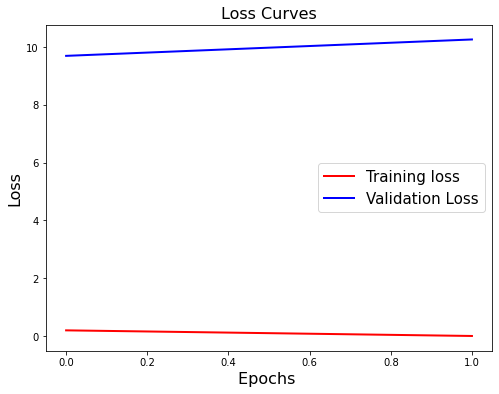

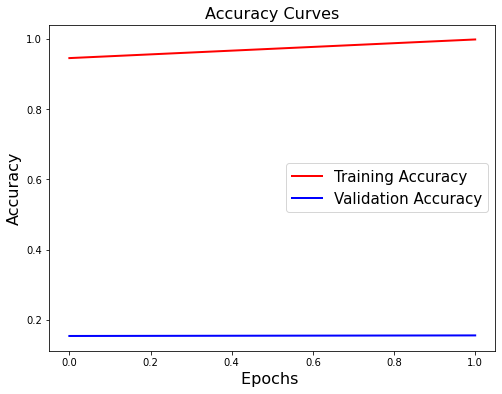

In [3]:

model=create_model()
batch_size=256
epochs=2#10#100
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_images, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_images, test_labels_one_hot))


plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Visualizing accuracy

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

model.evaluate(test_images, test_labels_one_hot)


Text(0.5, 1.0, 'Accuracy Curves')

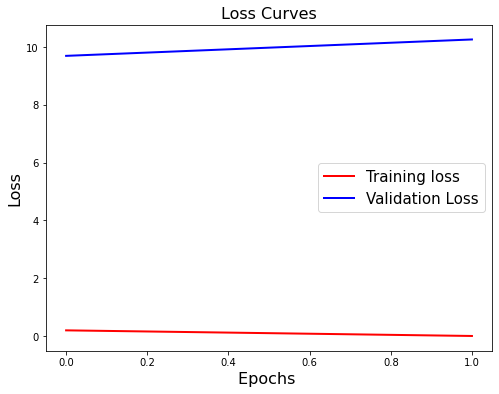

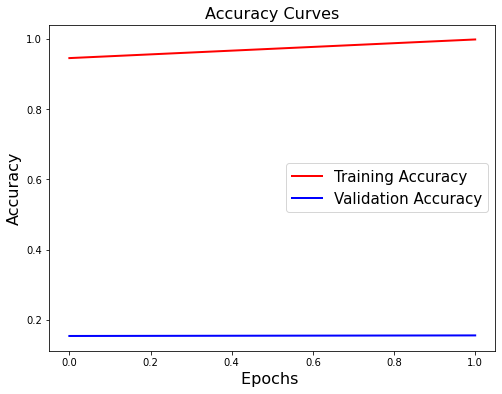

In [4]:



plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Visualizing accuracy

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



